# Final Results — Visualization

This notebook loads the JSONL outputs produced by `JeopardyCurator` (in `data/output/`) and provides quick visual summaries and sampled examples so you can easily inspect what the curation code produced.

It shows: counts per stratum, a simple bar chart, and a small random sample of example records from each file.

In [1]:
from pathlib import Path
import json
import random
import matplotlib.pyplot as plt
from utils.constants import *


# Paths and config
output_dir = Path(DEFAULT_OUTPUT_DIR)
FILES = {
    'numbers': 'number_phrases.jsonl',
    'non_english': 'non_english_phrases.jsonl',
    'unusual_proper_nouns': 'unusual_proper_nouns.jsonl'
}
SAMPLE_PER_FILE = 5  # how many example rows to show per file

# Helper: load a jsonl file into list of dicts
def load_jsonl(path: Path):
    if not path.exists():
        return []
    with path.open('r', encoding='utf-8') as f:
        return [json.loads(line) for line in f if line.strip()]

# Load all files
data = {}
for key, fname in FILES.items():
    p = output_dir / fname
    data[key] = load_jsonl(p)
    print(f'Loaded {len(data[key])} records from {p}')

Loaded 62404 records from data\output\number_phrases.jsonl
Loaded 4671 records from data\output\non_english_phrases.jsonl
Loaded 48034 records from data\output\unusual_proper_nouns.jsonl


Counts per stratum (saved sample files):
  numbers: 62404
  non_english: 4671
  unusual_proper_nouns: 48034


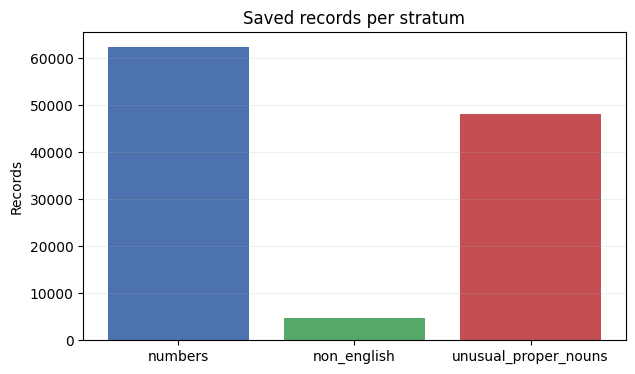

In [2]:
# Simple counts and bar chart
counts = {k: len(v) for k, v in data.items()}
print('Counts per stratum (saved sample files):')
for k, c in counts.items():
    print(f'  {k}: {c}')

# Bar chart
plt.figure(figsize=(7,4))
plt.bar(counts.keys(), counts.values(), color=['#4C72B0', '#55A868', '#C44E52'])
plt.title('Saved records per stratum')
plt.ylabel('Records')
plt.grid(axis='y', alpha=0.2)
plt.show()

In [3]:
# Function to pretty-print a small sample of records for inspection
from IPython.display import display, Markdown

def show_samples(key, n=SAMPLE_PER_FILE):
    items = data.get(key, [])
    if not items:
        display(Markdown(f'**{key}** — (file missing or empty)'))
        return
    sample = random.sample(items, min(n, len(items)))
    display(Markdown(f'### Examples from **{key}** (showing {len(sample)})'))
    for i, rec in enumerate(sample, 1):
        q = rec.get('question') or ''
        a = rec.get('answer') or ''
        cat = rec.get('category') or ''
        val = rec.get('value')
        display(Markdown(f'**{i}. Category:** {cat}  \n+**Question:** {q}  \n+**Answer:** {a}  \n+**Value:** {val}'))

# Show samples for all strata
for k in FILES.keys():
    show_samples(k)

### Examples from **numbers** (showing 5)

**1. Category:** GIVE ME AN "H"  
+**Question:** 'In Arizona the Navajo Indian reservation completely surrounds the one of this pueblo tribe'  
+**Answer:** the Hopi  
+**Value:** 800

**2. Category:** SUGAR  
+**Question:** '(<a href="http://www.j-archive.com/media/2011-01-05_DJ_07.jpg" target="_blank">Sarah of the Clue Crew looks at large bins of raw sugar at the Domino Sugar Refinery in New Orleans, LA.</a>)  Sugar beets can be stored but this plant, grown in Florida & used by Domino Sugar, deteriorates so it has to be quickly turned into raw sugar, then refined'  
+**Answer:** sugar cane  
+**Value:** 1600

**3. Category:** NOBEL LAUREATES SPEAK  
+**Question:** '(Here's Dr. Baltimore again):<br />"This infectious agent that lives inside a cell & causes disease can be 100 times smaller than a bacterium"'  
+**Answer:** virus  
+**Value:** 800

**4. Category:** PENNSYLVANIA DREAMIN'  
+**Question:** 'In 1850 this city that loves Feb. 2 became a borough; in 1850 this city that loves Feb. 2 became a borough; in 1850...'  
+**Answer:** Punxsutawney  
+**Value:** 1600

**5. Category:** HARVARD MUSEUM OF NATURAL HISTORY  
+**Question:** '(<a href="http://www.j-archive.com/media/2011-11-24_J_28.jpg" target="_blank">Jimmy of the Clue Crew delivers the clue from the Harvard Museum of Natural History in Cambridge, MA.</a>)  The Harvard Museum has part of the famous <a href="http://www.j-archive.com/media/2011-11-24_J_28a.jpg" target="_blank">Zagami meteorite</a>, which fell to the Earth in Nigeria in 1962; gases trapped inside match those found by Viking spacecraft, confirming the rock's distant origin on this planet'  
+**Answer:** Mars  
+**Value:** 600

### Examples from **non_english** (showing 5)

**1. Category:** SCIENCE BRIEFS  
+**Question:** 'It's elemental:<br />Zn'  
+**Answer:** zinc  
+**Value:** 800

**2. Category:** DANCE ORIGINS  
+**Question:** 'Habanera'  
+**Answer:** Cuba  
+**Value:** 400

**3. Category:** NEXT IN LINE, PLEASE  
+**Question:** 'Phi, chi, psi...'  
+**Answer:** Omega  
+**Value:** 300

**4. Category:** PRESIDENTIAL RHYME TIME  
+**Question:** 'Kennedy's khakis'  
+**Answer:** Jack\'s slacks  
+**Value:** 600

**5. Category:** GETTING MARRIED  
+**Question:** 'In a double ring ceremony, she gives the ring to the bride to place on the groom’s finger'  
+**Answer:** maid of honor  
+**Value:** 200

### Examples from **unusual_proper_nouns** (showing 5)

**1. Category:** SCIENCE  
+**Question:** 'All lines of longitude are measured east or west of this line'  
+**Answer:** Prime Meridian  
+**Value:** 300

**2. Category:** LITERARY EPITAPHS  
+**Question:** 'Fondly remembered by the boys of The Brookfield School.  Goodbye...'  
+**Answer:** Mr. Chips  
+**Value:** 1000

**3. Category:** HODGEPODGE  
+**Question:** '(Alex: To help us out with that clue, we have some very special guests)  These are members of a wildly popular show created by this man'  
+**Answer:** Michael Flatley  
+**Value:** 200

**4. Category:** THE ORDINARY JOE  
+**Question:** 'In a legal case, he's the equivalent of Mr. X; in real life, he was in the band X'  
+**Answer:** John Doe  
+**Value:** 300

**5. Category:** THE ENVIRONMENT  
+**Question:** 'This device added to a car's exhaust system eliminates much of the pollution produced by gas combustion'  
+**Answer:** Catalytic Converter  
+**Value:** 600